In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("wine-quality.csv")
data.head(10)
set(data.quality)

{3, 4, 5, 6, 7, 8, 9}

## Data Description

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Null Values 

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Correlation Matrix

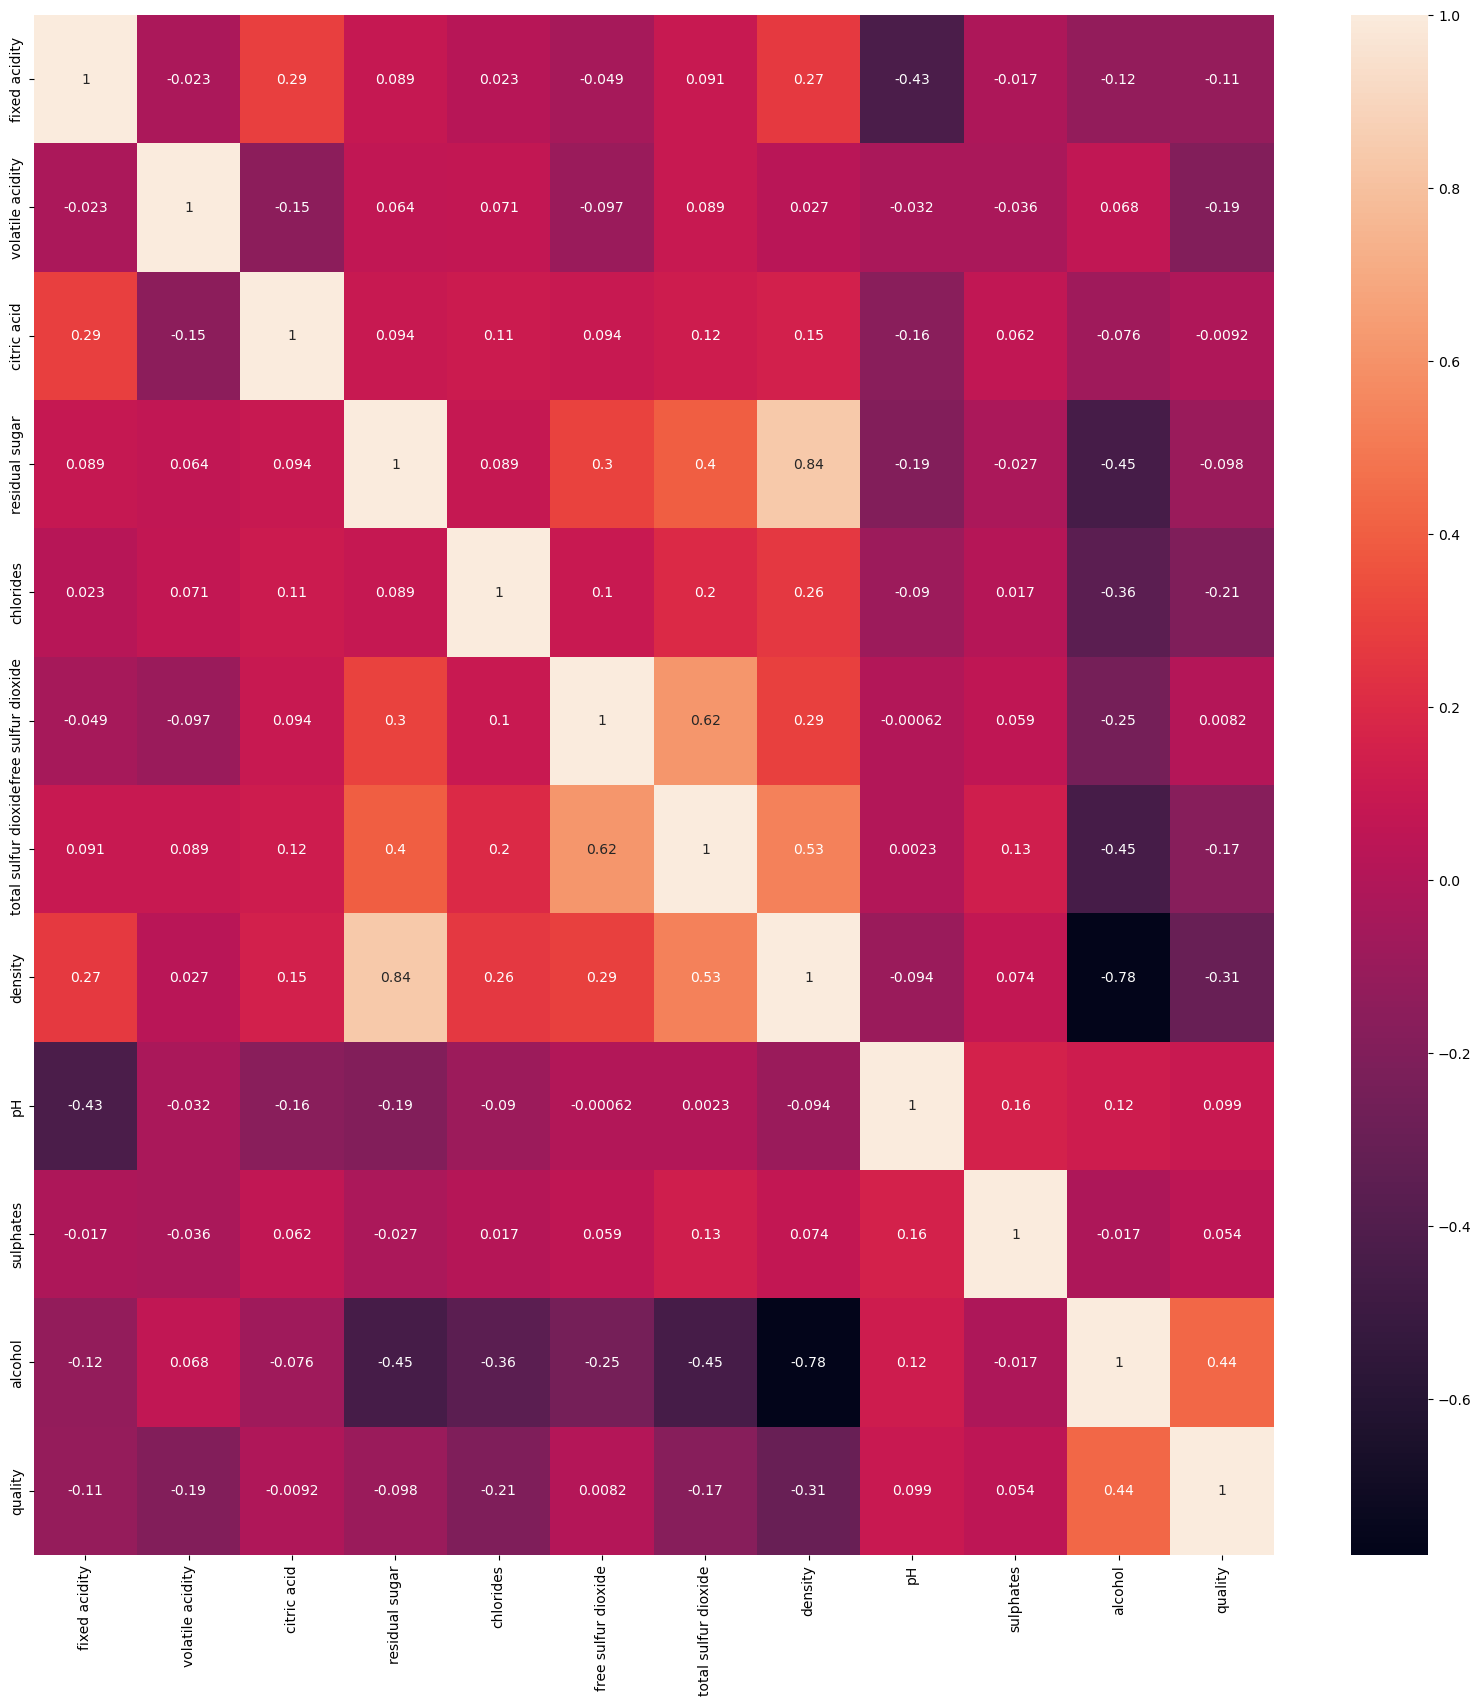

In [9]:
plt.figure(figsize=(20,20))
corr = data.corr()
sns.heatmap(corr,annot = True)
plt.savefig("Matrix.png")
plt.show()

## OutLier Detection Using Z-Score

In [10]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.172097          0.081770     0.213280        2.821349   0.035355   
1          0.657501          0.215896     0.048001        0.944765   0.147747   
2          1.475751          0.017452     0.543838        0.100282   0.193523   
3          0.409125          0.478657     0.117278        0.415768   0.559727   
4          0.409125          0.478657     0.117278        0.415768   0.559727   
...             ...               ...          ...             ...        ...   
4893       0.776015          0.677101     0.365197        0.944765   0.310008   
4894       0.301959          0.414339     0.213280        0.317179   0.056196   
4895       0.420473          0.379435     1.191592        1.023637   0.218457   
4896       1.605613          0.116674     0.282557        1.043355   1.088192   
4897       1.013043          0.677101     0.378559        1.102508   1.179743   

      free sulfur dioxide  

## Z > 3 is a OutLier

In [27]:
sanitized_data = data[(z<3).all(axis=1)]
sanitized_data.shape

(4487, 12)

In [18]:
data.shape

(4898, 12)

## Data Splitting 

In [12]:
from sklearn.model_selection import train_test_split
X = sanitized_data.drop(columns="quality")
Y = sanitized_data["quality"]

In [22]:
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0


In [23]:
Y.head(10)

0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: quality, dtype: int64

In [13]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size = 0.2)

## Random Forest Algorithm 

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50)

In [31]:
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50)

## Prediction of Data

In [32]:
prediction = rf.predict(X_test)
prediction

array([5, 6, 6, 5, 4, 7, 5, 7, 6, 6, 6, 6, 5, 6, 5, 5, 7, 6, 7, 5, 6, 6,
       7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6,
       7, 6, 5, 6, 7, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5, 6, 6, 6, 5, 7, 6, 5, 6, 6, 6,
       7, 6, 6, 6, 6, 6, 7, 6, 5, 7, 6, 5, 6, 5, 6, 5, 6, 7, 7, 5, 5, 8,
       6, 6, 6, 6, 7, 6, 5, 6, 7, 6, 6, 6, 5, 5, 7, 7, 6, 5, 6, 8, 7, 6,
       6, 6, 6, 7, 6, 5, 7, 7, 6, 6, 7, 7, 7, 6, 6, 6, 7, 6, 5, 6, 8, 6,
       5, 5, 6, 5, 6, 5, 7, 6, 6, 6, 6, 6, 6, 5, 5, 6, 7, 6, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 7, 8, 6, 5, 6, 6, 7, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6,
       7, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 7, 7, 5, 6, 6, 7, 5, 7, 5, 7, 6,
       5, 7, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 8, 6, 8,
       5, 6, 7, 6, 6, 6, 6, 7, 7, 5, 5, 7, 6, 5, 7, 7, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 4, 6, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 5, 7, 6, 6, 5, 6, 6, 6, 5,

## Data Evaluation

In [33]:
from sklearn import metrics
print("Accuracy Score ",(metrics.accuracy_score(Y_test,prediction))*100)

Accuracy Score  66.48106904231625
